# Section 3: Training a Supervised Learning Model
### Lecture 12: Improving the XGBoost Model through Hyperparameter Selection
- https://xgboost.readthedocs.io/en/stable/python/index.html

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../Modulo2/creditcard.csv.zip')

y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [29]:
#penalizar positiva classe, possitiva fraude, 1

In [30]:
from sklearn import set_config
set_config(display="text")  # desativa exibição HTML, usa só repr de texto

In [31]:
import xgboost as xgb

model = xgb.XGBClassifier(scale_pos_weight=100)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 100,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [33]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print(set(y_pred)) # prever se é fraude 1 ou não 0

import numpy as np
np.unique(y_pred, return_counts=True)

{0, 1}


(array([0, 1]), array([28435,    46]))

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[28427,     5],
       [    8,    41]])

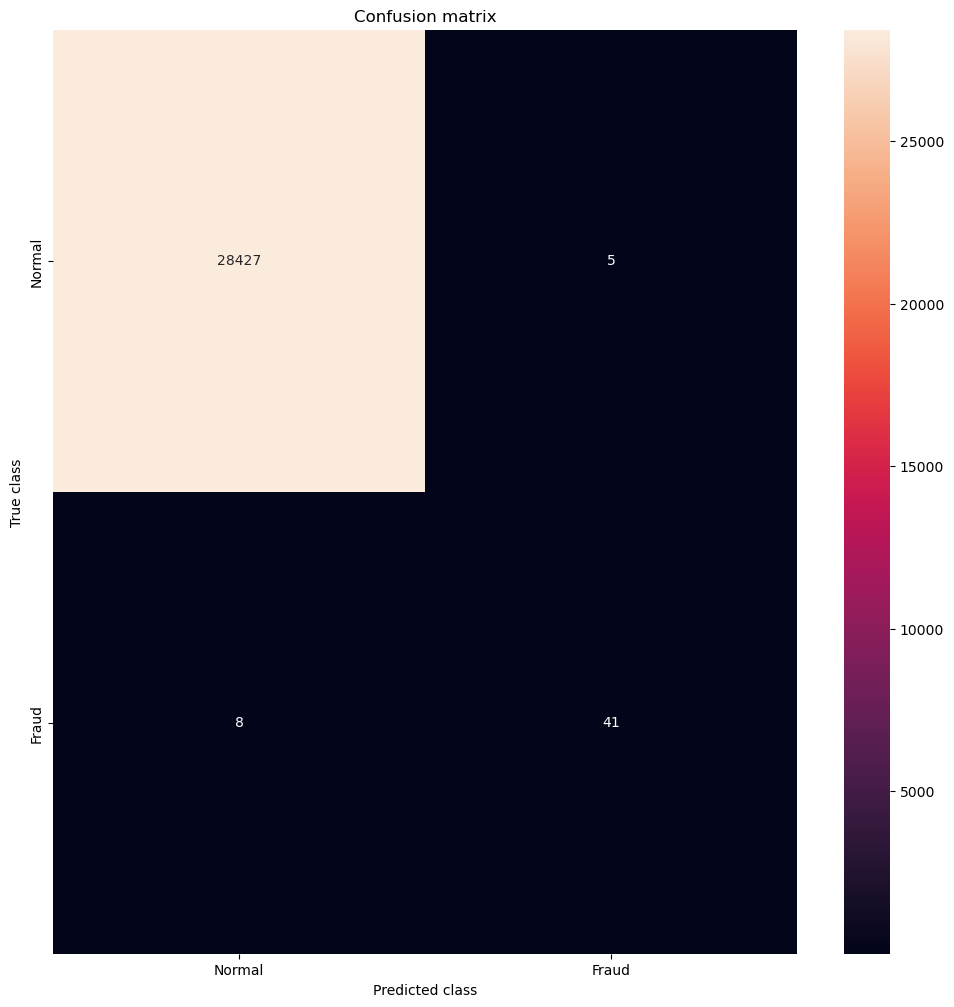

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Tools like hyperopt and optuna

In [37]:
# positivo peso (scale_pos_weight=100), é considerar o peso maior na fraude prevista ser no real, 
# max_depth = baixo, para evitar overfitting
# otimizamos o problema

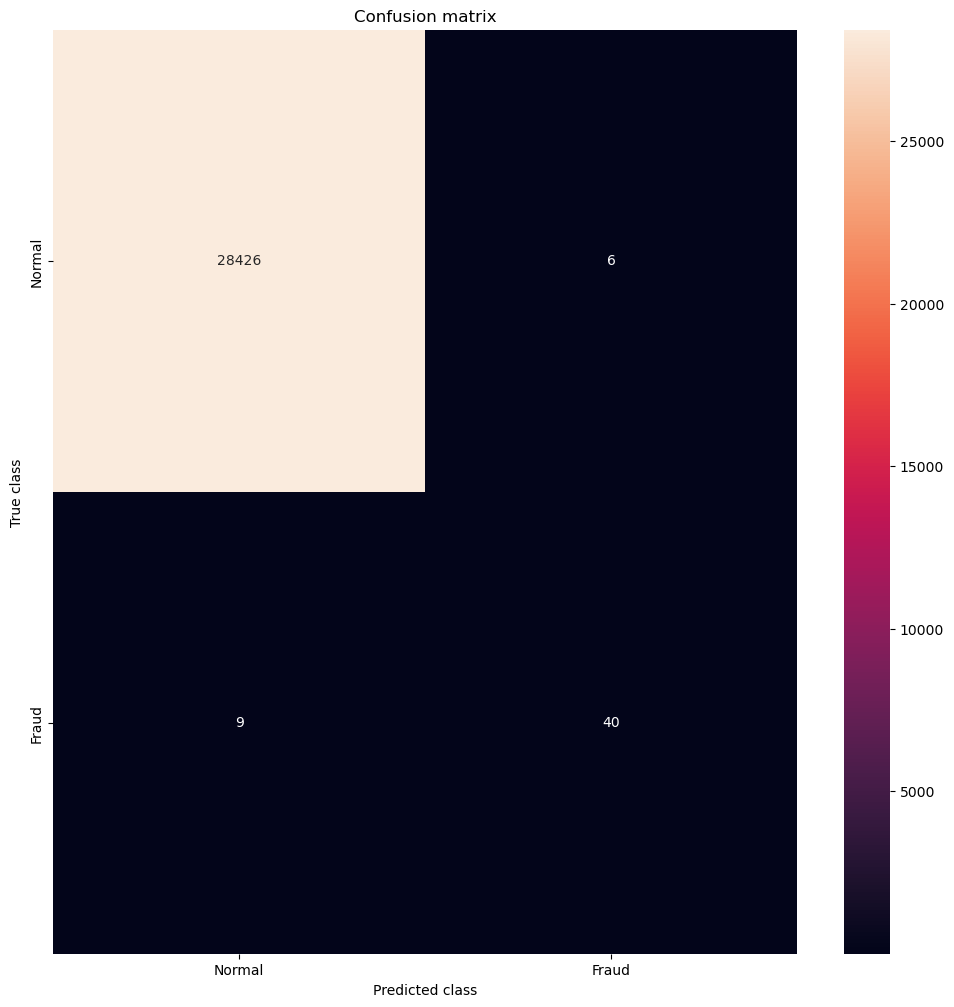

In [38]:
model = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100) 
# max_depth specifies the maximum depth to which each tree will be built.
# reduces overfitting
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LABELS = ["Normal", "Fraud"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

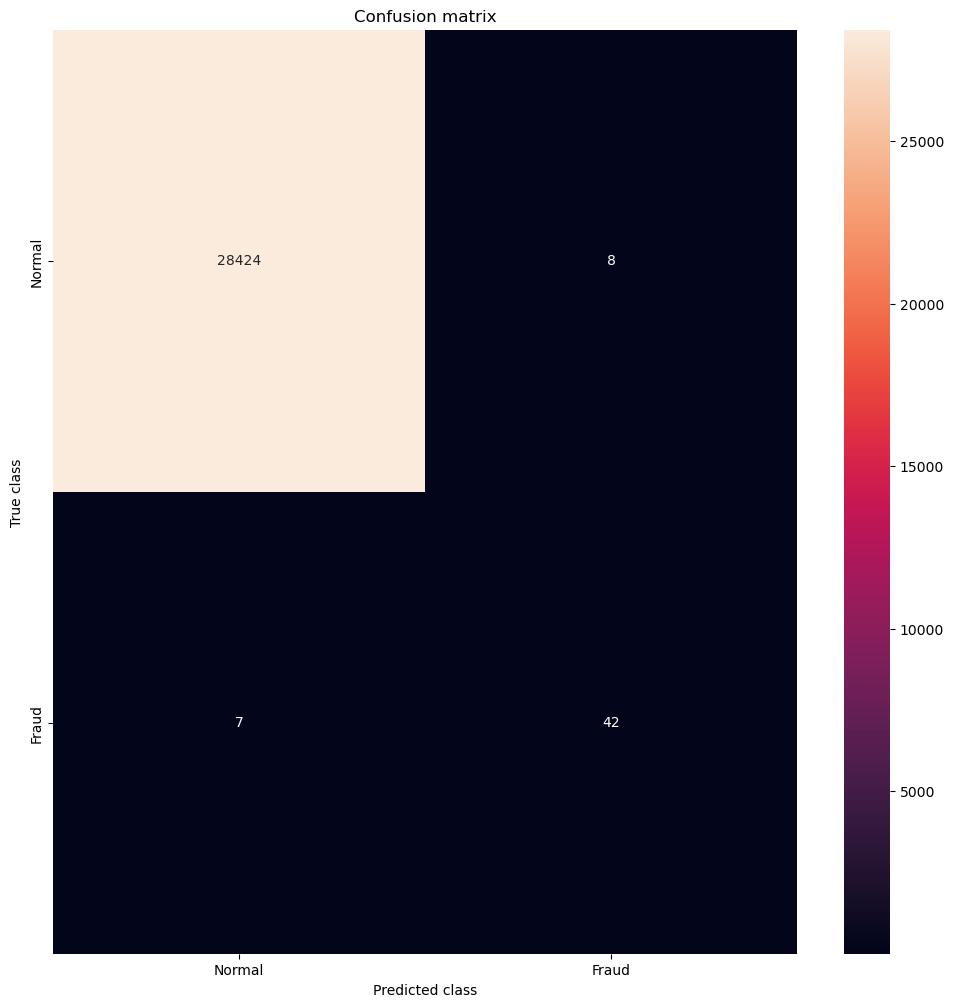

In [46]:
model = xgb.XGBClassifier(max_depth=4, scale_pos_weight=100) 
# max_depth specifies the maximum depth to which each tree will be built.
# reduces overfitting
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LABELS = ["Normal", "Fraud"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Parâmetros:

max_depth=5: Este parâmetro controla a profundidade máxima de cada árvore de decisão que o modelo constrói. Uma profundidade menor (como 5) ajuda a evitar o overfitting (quando o modelo "decore" os dados de treinamento e não generaliza bem para novos dados), tornando-o mais simples e robusto.

scale_pos_weight=100: Este é um parâmetro muito importante para conjuntos de dados desbalanceados, como aqueles em que a classe positiva (por exemplo, transações fraudulentas) é muito mais rara que a classe negativa (transações normais). O valor 100 diz ao modelo que ele deve dar um peso 100 vezes maior à classe minoritária. Em outras palavras, o custo de errar uma previsão para a classe minoritária é 100 vezes maior, forçando o modelo a prestar muito mais atenção a esses casos raros.

Em resumo, a linha de código está criando um modelo XGBoost que é configurado para ser eficiente e robusto (max_depth), enquanto é ajustado para lidar de forma eficaz com um problema de dados desbalanceados (scale_pos_weight).